In [1]:
# IMPORT LIBRARIES
import pandas as pd
import sqlalchemy  # This is the basic library for this purpose
#importing libraries
from sqlalchemy import *
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy.sql import *

engine = create_engine('sqlite:///demographics.db') #Database connection(Create the database). REFERED TO AS API
Base = declarative_base() # This is a mapper or a meta class that will provide data to create tables

In [2]:
df_transaction=pd.read_csv('transactions.csv')
df_transaction.head()

,PANID,WEEK,UNITS,OUTLET,DOLLARS,IRI_KEY,COLUPC,prod,Calendar_week_starting_on,Calendar_week_ending_on
0,1101238,1322,1,GR,0.50,213290,13663200157,yogurt,27/12/04,2005-02-01 00:00:00
1,1216259,1322,2,GR,1.00,213290,13663200157,yogurt,27/12/04,2005-02-01 00:00:00
2,1164905,1322,1,GR,2.19,213290,13663200282,yogurt,27/12/04,2005-02-01 00:00:00
3,1404418,1322,1,GR,2.29,213290,13663200900,yogurt,27/12/04,2005-02-01 00:00:00
4,1405373,1322,1,GR,2.29,213290,13663200906,yogurt,27/12/04,2005-02-01 00:00:00


In [3]:
df_transaction.nunique()

PANID                        4768
WEEK                           52
UNITS                          24
OUTLET                          1
DOLLARS                       686
IRI_KEY                        26
COLUPC                        608
prod                            1
Calendar_week_starting_on      52
Calendar_week_ending_on        52
dtype: int64

In [4]:
len(df_transaction)

160062

In [5]:
# WE ARE CREATING THE STAGES FROM WHICH WE WILL FURTHER TRANSFORM THE DATA. THIS IS FIRST STEP(EXTRACTION)

# create necessary data model

#These are basically creating tables for each csv file

#for df_panelist_demographics
class panelist_demographics_table(Base):
    __tablename__ = "panelist_demographics_table"
    PANID=Column(Float, primary_key=True)                              
    Combined_Pre_Tax_Income_of_HH=Column(Float)
    Family_Size=Column(Float)
    HH_RACE= Column(String)
    Type_of_Residential_Possession=Column(Float)
    HH_AGE=Column(Float)
    HH_EDU=Column(Float)
    HH_OCC=Column(Float)
    Age_Group_Applied_to_Male_HH=Column(Float)
    Education_Level_Reached_by_Male_=Column(Float)
    Occupation_Code_of_Male_HH=Column(Float)
    Male_Working_Hour_Code=Column(Float)
    MALE_SMOKE= Column(String)
    Age_Group_Applied_to_Female_HH=Column(Float)
    Education_Level_Reached_by_Femal=Column(Float)
    Occupation_Code_of_Female_HH=Column(Float)
    Female_Working_Hour_Code=Column(Float)
    FEM_SMOKE= Column(String)
    Number_of_Dogs=Column(Float)
    Number_of_Cats=Column(Float)
    Children_Group_Code=Column(Float)
    Marital_Status=Column(Float)
    Number_of_TVs_Used_by_HH= Column(String)
    Number_of_TVs_Hooked_to_Cable= Column(String)
    HH_Head_Race__RACE2_= Column(String)
    HH_Head_Race__RACE3_=Column(Float)
    Microwave_Owned_by_HH= Column(String)
    
  

#for df_transactions
class transaction_table(Base):
    __tablename__ = 'transaction_table'
    PANID=Column(Float)
    WEEK=Column(Float)
    UNITS=Column(Float)
    OUTLET= Column(String)
    DOLLARS=Column(Float)
    IRI_KEY=Column(Float, primary_key=True)
    COLUPC=Column(Float)
    prod= Column(String)
    Calendar_week_starting_on= Column(String)
    Calendar_week_ending_on= Column(String)
  
#for df_product_features
class product_features_table(Base):
    __tablename__ = 'product_features_table'
    L5= Column(String)
    SY=Column(Float)
    GE=Column(Float)
    VEND=Column(Float)
    ITEM=Column(Float)
    COLUPC=Column(Float, primary_key=True)
    PRODUCT_TYPE= Column(String)
    PACKAGE= Column(String)
    FLAVOR_SCENT= Column(String)
    FAT_CONTENT= Column(String)
    CALORIE_LEVEL= Column(String)
    STYLE= Column(String)
    TYPE_OF_YOGURT= Column(String)
    
panelist_demographics_table.__table__.create(bind=engine, checkfirst=True)
transaction_table.__table__.create(bind=engine, checkfirst=True)
product_features_table.__table__.create(bind=engine, checkfirst=True)


In [6]:
df_panelist_demographics=pd.read_csv('panelist_demographics.csv')
df_product_features=pd.read_csv('product_features.csv')

In [7]:
#Convert the all the rows into dictionary then put them in a list
df_panelist_demographics_dict=df_panelist_demographics.to_dict(orient='records')
df_product_features_dict=df_product_features.to_dict(orient='records')
df_transaction_dict=df_transaction.to_dict(orient='records')

In [8]:
# INSERTING DATA TO THE API

engine.echo=True
Session = sessionmaker(bind=engine) # ADDING DATA TO API( ENGINE)
session = Session()

for std in df_panelist_demographics_dict:
    row = panelist_demographics_table(**std)
    session.add(row)
    
for std in df_product_features_dict:
    row = product_features_table(**std)
    session.add(row)
    
for std in df_transaction_dict:
    row = transaction_table(**std)
    session.add(row)
session.commit()

2020-05-28 10:28:41,457 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-05-28 10:28:41,941 INFO sqlalchemy.engine.base.Engine INSERT INTO panelist_demographics_table ("PANID", "Combined_Pre_Tax_Income_of_HH", "Family_Size", "HH_RACE", "Type_of_Residential_Possession", "HH_AGE", "HH_EDU", "HH_OCC", "Age_Group_Applied_to_Male_HH", "Education_Level_Reached_by_Male_", "Occupation_Code_of_Male_HH", "Male_Working_Hour_Code", "MALE_SMOKE", "Age_Group_Applied_to_Female_HH", "Education_Level_Reached_by_Femal", "Occupation_Code_of_Female_HH", "Female_Working_Hour_Code", "FEM_SMOKE", "Number_of_Dogs", "Number_of_Cats", "Children_Group_Code", "Marital_Status", "Number_of_TVs_Used_by_HH", "Number_of_TVs_Hooked_to_Cable", "HH_Head_Race__RACE2_", "HH_Head_Race__RACE3_", "Microwave_Owned_by_HH") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2020-05-28 10:28:41,941 INFO sqlalchemy.engine.base.Engine ((1100016.0, 3.0, 3.0, '1', 2.0, 6.0, 3.0, 10.0, 6.0

In [9]:
# READING THE DATA FROM THE DATA BASE

df=pd.read_sql_query('SELECT * FROM panelist_demographics_table',engine.connect())
df.head()

2020-05-28 10:29:08,053 INFO sqlalchemy.engine.base.Engine SELECT * FROM panelist_demographics_table
2020-05-28 10:29:08,053 INFO sqlalchemy.engine.base.Engine ()


,PANID,Combined_Pre_Tax_Income_of_HH,Family_Size,HH_RACE,Type_of_Residential_Possession,HH_AGE,HH_EDU,HH_OCC,Age_Group_Applied_to_Male_HH,Education_Level_Reached_by_Male_,...,FEM_SMOKE,Number_of_Dogs,Number_of_Cats,Children_Group_Code,Marital_Status,Number_of_TVs_Used_by_HH,Number_of_TVs_Hooked_to_Cable,HH_Head_Race__RACE2_,HH_Head_Race__RACE3_,Microwave_Owned_by_HH
0,1100016.0,3.0,3.0,1,2.0,6.0,3.0,10.0,6.0,2.0,...,0,0.0,0.0,8.0,2.0,3,3,1,1.0,1
1,1100032.0,6.0,2.0,1,2.0,5.0,7.0,6.0,7.0,9.0,...,0,0.0,1.0,3.0,1.0,2,1,1,1.0,1
2,1100057.0,10.0,2.0,1,2.0,6.0,6.0,4.0,6.0,4.0,...,0,1.0,0.0,8.0,2.0,3,3,1,1.0,1
3,1100180.0,11.0,2.0,1,2.0,5.0,5.0,1.0,5.0,6.0,...,0,1.0,1.0,8.0,2.0,2,2,1,1.0,1
4,1100198.0,5.0,2.0,1,2.0,6.0,5.0,10.0,6.0,5.0,...,0,0.0,1.0,8.0,2.0,2,2,1,1.0,.


# 1.Read the transation.csv file.
# 2.Calculate how much a family (or panelist) spends on yogurt each week and how many varieties of yogurt they buy in a week.

In [11]:
df_transaction.head()

,PANID,WEEK,UNITS,OUTLET,DOLLARS,IRI_KEY,COLUPC,prod,Calendar_week_starting_on,Calendar_week_ending_on
0,1101238,1322,1,GR,0.50,213290,13663200157,yogurt,27/12/04,2005-02-01 00:00:00
1,1216259,1322,2,GR,1.00,213290,13663200157,yogurt,27/12/04,2005-02-01 00:00:00
2,1164905,1322,1,GR,2.19,213290,13663200282,yogurt,27/12/04,2005-02-01 00:00:00
3,1404418,1322,1,GR,2.29,213290,13663200900,yogurt,27/12/04,2005-02-01 00:00:00
4,1405373,1322,1,GR,2.29,213290,13663200906,yogurt,27/12/04,2005-02-01 00:00:00


In [12]:
df=df_transaction.groupby(['PANID','WEEK']).sum().reset_index()
df=df.drop(['IRI_KEY','COLUPC'],axis=1)
df

,PANID,WEEK,UNITS,DOLLARS
0,1100032,1322,7,5.25
1,1100032,1323,5,2.50
2,1100032,1324,4,2.75
3,1100032,1325,4,2.82
4,1100032,1326,7,5.25
...,...,...,...,...
52736,3843052,1361,5,3.25
52737,3843052,1362,5,2.68
52738,3843052,1367,5,2.00
52739,3843052,1370,5,2.00


In [13]:
df_uniq=df_transaction.groupby(['PANID','WEEK']).count().reset_index()
df_uniq=df_uniq.drop(['WEEK','UNITS','OUTLET','DOLLARS','IRI_KEY','prod','Calendar_week_starting_on','Calendar_week_ending_on'],axis=1)
df_uniq

,PANID,COLUPC
0,1100032,6
1,1100032,5
2,1100032,4
3,1100032,4
4,1100032,6
...,...,...
52736,3843052,2
52737,3843052,2
52738,3843052,2
52739,3843052,2


In [14]:
df_final=pd.merge(df,df_uniq,on='PANID')
df_final=df_final.rename(columns={'UNITS':'units','DOLLARS':'spend','COLUPC':'unique_products'})

# Final output
df_final

,PANID,WEEK,units,spend,unique_products
0,1100032,1322,7,5.25,6
1,1100032,1322,7,5.25,5
2,1100032,1322,7,5.25,4
3,1100032,1322,7,5.25,4
4,1100032,1322,7,5.25,6
...,...,...,...,...,...
1022300,3843052,1373,5,2.25,2
1022301,3843052,1373,5,2.25,2
1022302,3843052,1373,5,2.25,2
1022303,3843052,1373,5,2.25,2


# Find the weekly behavior of each panelist. Calculate the average and variation of weekly spend, weekly average and variation units purchased, and weekly average and variation of different types of yogurt purchased byeach panelist.

In [16]:
df_total_units=df_transaction.groupby(['PANID']).sum().reset_index()
df_total_units=df_total_units[['PANID','UNITS','DOLLARS']]
df_total_units

,PANID,UNITS,DOLLARS
0,1100032,209,133.88
1,1100057,8,5.64
2,1100180,22,74.56
3,1100198,9,6.54
4,1100214,18,13.61
...,...,...,...
4763,3842898,13,6.17
4764,3842914,14,6.47
4765,3842948,45,22.75
4766,3842971,115,63.27


In [17]:
df_total_week=df_transaction.groupby(['PANID']).count().reset_index()
df_total_week=df_total_week[['PANID','WEEK',]]
df_total_week

,PANID,WEEK
0,1100032,165
1,1100057,4
2,1100180,21
3,1100198,8
4,1100214,17
...,...,...
4763,3842898,12
4764,3842914,11
4765,3842948,45
4766,3842971,38


In [18]:
df_final_avg=pd.merge(df_total_units,df_total_week,on='PANID')

fn=lambda row: row.UNITS/row.WEEK
col=df_final_avg.apply(fn,axis=1)
df_final_avg=df_final_avg.assign(**{'avg_units':col})

fn2=lambda row: row.DOLLARS/row.WEEK
col2=df_final_avg.apply(fn2,axis=1)
df_final_avg=df_final_avg.assign(**{'avg_spends':col2})

df_final_avg

,PANID,UNITS,DOLLARS,WEEK,avg_units,avg_spends
0,1100032,209,133.88,165,1.266667,0.811394
1,1100057,8,5.64,4,2.000000,1.410000
2,1100180,22,74.56,21,1.047619,3.550476
3,1100198,9,6.54,8,1.125000,0.817500
4,1100214,18,13.61,17,1.058824,0.800588
...,...,...,...,...,...,...
4763,3842898,13,6.17,12,1.083333,0.514167
4764,3842914,14,6.47,11,1.272727,0.588182
4765,3842948,45,22.75,45,1.000000,0.505556
4766,3842971,115,63.27,38,3.026316,1.665000


In [19]:
df_uniqueprod=df_final.groupby('PANID').sum().reset_index()
df_uniqueprod=df_uniqueprod[['PANID','unique_products']]
df_uniqueprod

,PANID,unique_products
0,1100032,5775
1,1100057,16
2,1100180,252
3,1100198,24
4,1100214,68
...,...,...
4763,3842898,72
4764,3842914,66
4765,3842948,450
4766,3842971,304


In [20]:
df_final_avg=pd.merge(df_final_avg,df_uniqueprod,on='PANID')

fn=lambda row: row.unique_products/row.WEEK
col=df_final_avg.apply(fn,axis=1)
df_final_avg=df_final_avg.assign(**{'avg_unique_products':col})


df_final_avg

,PANID,UNITS,DOLLARS,WEEK,avg_units,avg_spends,unique_products,avg_unique_products
0,1100032,209,133.88,165,1.266667,0.811394,5775,35.0
1,1100057,8,5.64,4,2.000000,1.410000,16,4.0
2,1100180,22,74.56,21,1.047619,3.550476,252,12.0
3,1100198,9,6.54,8,1.125000,0.817500,24,3.0
4,1100214,18,13.61,17,1.058824,0.800588,68,4.0
...,...,...,...,...,...,...,...,...
4763,3842898,13,6.17,12,1.083333,0.514167,72,6.0
4764,3842914,14,6.47,11,1.272727,0.588182,66,6.0
4765,3842948,45,22.75,45,1.000000,0.505556,450,10.0
4766,3842971,115,63.27,38,3.026316,1.665000,304,8.0


In [79]:
df_temp=pd.merge(df_final,df_final_avg,on='PANID')
df_temp=df_temp.drop(['WEEK_x','unique_products_x','UNITS','DOLLARS','WEEK_y'],axis=1)
df_temp=df_temp.drop_duplicates(subset=None, keep='first', inplace=False)
df_temp


,PANID,units,spend,avg_units,avg_spends,unique_products_y,avg_unique_products
0,1100032,7,5.25,1.266667,0.811394,5775,35.0
35,1100032,5,2.50,1.266667,0.811394,5775,35.0
70,1100032,4,2.75,1.266667,0.811394,5775,35.0
105,1100032,4,2.82,1.266667,0.811394,5775,35.0
175,1100032,6,4.80,1.266667,0.811394,5775,35.0
...,...,...,...,...,...,...,...
1022029,3843052,8,3.20,2.367347,1.165102,1127,23.0
1022075,3843052,3,1.53,2.367347,1.165102,1127,23.0
1022121,3843052,5,2.91,2.367347,1.165102,1127,23.0
1022213,3843052,5,2.68,2.367347,1.165102,1127,23.0


In [84]:
df_sum=df_temp.groupby('PANID').count().reset_index()
df_sum=df_sum[['PANID','units']]
df_sum=df_sum.rename(columns={'units':'Total'})
df_sum

,PANID,Total
0,1100032,29
1,1100057,2
2,1100180,7
3,1100198,2
4,1100214,4
...,...,...
4763,3842898,6
4764,3842914,6
4765,3842948,10
4766,3842971,6


In [85]:
df_temp=pd.merge(df_temp,df_sum,on='PANID')
df_temp

,PANID,units,spend,avg_units,avg_spends,unique_products_y,avg_unique_products,Total(n),Total
0,1100032,7,5.25,1.266667,0.811394,5775,35.0,29,29
1,1100032,5,2.50,1.266667,0.811394,5775,35.0,29,29
2,1100032,4,2.75,1.266667,0.811394,5775,35.0,29,29
3,1100032,4,2.82,1.266667,0.811394,5775,35.0,29,29
4,1100032,6,4.80,1.266667,0.811394,5775,35.0,29,29
...,...,...,...,...,...,...,...,...,...
43587,3843052,8,3.20,2.367347,1.165102,1127,23.0,14,14
43588,3843052,3,1.53,2.367347,1.165102,1127,23.0,14,14
43589,3843052,5,2.91,2.367347,1.165102,1127,23.0,14,14
43590,3843052,5,2.68,2.367347,1.165102,1127,23.0,14,14


In [88]:
fn=lambda row: ((row.units-row.avg_units)**2/(row.Total-1))**0.5
col=df_temp.apply(fn,axis=1)
df_temp=df_temp.assign(**{'std_units':col})

fn1=lambda row: ((row.spend-row.avg_spends)**2/(row.Total-1))**0.5
col=df_temp.apply(fn1,axis=1)
df_temp=df_temp.assign(**{'std_spend':col})

fn2=lambda row: ((row.unique_products_y-row.avg_unique_products)**2/(row.Total-1))**0.5
col=df_temp.apply(fn2,axis=1)
df_temp=df_temp.assign(**{'std_unique_products':col})

df_temp=df_temp[['PANID','std_units','std_spend','std_unique_products']]
df_temp

C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\AYAN\anaconda3\ANACONDA_NEW\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ ==

,PANID,std_units,std_spend,std_unique_products
0,1100032,1.083498,0.838818,1084.758038
1,1100032,0.705534,0.319117,1084.758038
2,1100032,0.516551,0.366362,1084.758038
3,1100032,0.516551,0.379591,1084.758038
4,1100032,0.894516,0.753776,1084.758038
...,...,...,...,...
43587,3843052,1.562217,0.564379,306.194508
43588,3843052,0.175466,0.101204,306.194508
43589,3843052,0.730167,0.483948,306.194508
43590,3843052,0.730167,0.420157,306.194508


In [89]:
df_temp=df_temp.groupby('PANID').sum().reset_index()
df_temp

,PANID,std_units,std_spend,std_unique_products
0,1100032,26.507908,17.078245,31457.983089
1,1100057,0.000000,0.120000,24.000000
2,1100180,2.391169,9.241769,685.857128
3,1100198,3.750000,2.535000,42.000000
4,1100214,7.947057,6.008858,147.801669
...,...,...,...,...
4763,3842898,2.981424,1.481768,177.096584
4764,3842914,3.089839,1.340421,160.996894
4765,3842948,11.666667,5.898148,1466.666667
4766,3842971,31.705090,17.342943,794.251346


In [90]:
df_final_avg=df_final_avg[['PANID','avg_units','avg_spends','avg_unique_products']]
df_final_avg

,PANID,avg_units,avg_spends,avg_unique_products
0,1100032,1.266667,0.811394,35.0
1,1100057,2.000000,1.410000,4.0
2,1100180,1.047619,3.550476,12.0
3,1100198,1.125000,0.817500,3.0
4,1100214,1.058824,0.800588,4.0
...,...,...,...,...
4763,3842898,1.083333,0.514167,6.0
4764,3842914,1.272727,0.588182,6.0
4765,3842948,1.000000,0.505556,10.0
4766,3842971,3.026316,1.665000,8.0


In [91]:
# Final output

df_final_output=pd.merge(df_final_avg,df_temp,on='PANID')
df_final_output

,PANID,avg_units,avg_spends,avg_unique_products,std_units,std_spend,std_unique_products
0,1100032,1.266667,0.811394,35.0,26.507908,17.078245,31457.983089
1,1100057,2.000000,1.410000,4.0,0.000000,0.120000,24.000000
2,1100180,1.047619,3.550476,12.0,2.391169,9.241769,685.857128
3,1100198,1.125000,0.817500,3.0,3.750000,2.535000,42.000000
4,1100214,1.058824,0.800588,4.0,7.947057,6.008858,147.801669
...,...,...,...,...,...,...,...
4763,3842898,1.083333,0.514167,6.0,2.981424,1.481768,177.096584
4764,3842914,1.272727,0.588182,6.0,3.089839,1.340421,160.996894
4765,3842948,1.000000,0.505556,10.0,11.666667,5.898148,1466.666667
4766,3842971,3.026316,1.665000,8.0,31.705090,17.342943,794.251346


# Find the missing values and fill the values with zeros.

In [22]:
df_transaction.isnull().sum()

PANID                        0
WEEK                         0
UNITS                        0
OUTLET                       0
DOLLARS                      0
IRI_KEY                      0
COLUPC                       0
prod                         0
Calendar_week_starting_on    0
Calendar_week_ending_on      0
dtype: int64

In [23]:
df_transaction=df_transaction.fillna(0)
df_transaction.head()

,PANID,WEEK,UNITS,OUTLET,DOLLARS,IRI_KEY,COLUPC,prod,Calendar_week_starting_on,Calendar_week_ending_on
0,1101238,1322,1,GR,0.50,213290,13663200157,yogurt,27/12/04,2005-02-01 00:00:00
1,1216259,1322,2,GR,1.00,213290,13663200157,yogurt,27/12/04,2005-02-01 00:00:00
2,1164905,1322,1,GR,2.19,213290,13663200282,yogurt,27/12/04,2005-02-01 00:00:00
3,1404418,1322,1,GR,2.29,213290,13663200900,yogurt,27/12/04,2005-02-01 00:00:00
4,1405373,1322,1,GR,2.29,213290,13663200906,yogurt,27/12/04,2005-02-01 00:00:00


# Encoding

In [25]:
from sklearn import preprocessing

label_encoders=dict()
encode_c=['OUTLET','prod','Calendar_week_starting_on','Calendar_week_ending_on']

for col in encode_c:
    le=preprocessing.LabelEncoder()
    df_transaction[col]=le.fit_transform(df_transaction[col])
    label_encoders[col]=le
    
df_transaction.head()

,PANID,WEEK,UNITS,OUTLET,DOLLARS,IRI_KEY,COLUPC,prod,Calendar_week_starting_on,Calendar_week_ending_on
0,1101238,1322,1,0,0.50,213290,13663200157,0,44,16
1,1216259,1322,2,0,1.00,213290,13663200157,0,44,16
2,1164905,1322,1,0,2.19,213290,13663200282,0,44,16
3,1404418,1322,1,0,2.29,213290,13663200900,0,44,16
4,1405373,1322,1,0,2.29,213290,13663200906,0,44,16


# Normalize the data and perform clustering analysis on the same

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x=scaler.fit_transform(df_transaction.values)

x[:5]

array([[4.39661395e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.32924335e-02, 0.00000000e+00, 1.77073610e-04, 0.00000000e+00,
        8.62745098e-01, 3.13725490e-01],
       [4.23719113e-02, 0.00000000e+00, 2.85714286e-02, 0.00000000e+00,
        3.88548057e-02, 0.00000000e+00, 1.77073610e-04, 0.00000000e+00,
        8.62745098e-01, 3.13725490e-01],
       [2.36502104e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.96932515e-02, 0.00000000e+00, 1.77073624e-04, 0.00000000e+00,
        8.62745098e-01, 3.13725490e-01],
       [1.10967474e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.04805726e-01, 0.00000000e+00, 1.77073694e-04, 0.00000000e+00,
        8.62745098e-01, 3.13725490e-01],
       [1.11315630e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.04805726e-01, 0.00000000e+00, 1.77073695e-04, 0.00000000e+00,
        8.62745098e-01, 3.13725490e-01]])

# Kmeans clustering

In [29]:
# In this step we find out ideal k value
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

l = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(x)
    
    m = kmeans.inertia_
    l.append(m)

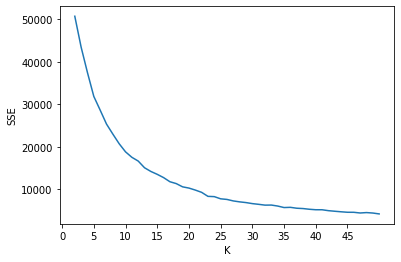

In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.plot(range(2, len(l) + 2), l)
plt.ylabel('SSE', fontsize=10)
plt.xlabel('K', fontsize=10)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# the graph shows that ideal value of K is 12

In [31]:
# The above graph shows bend at k=6. so n_clusters=6

kmeans = KMeans(n_clusters=12, n_init=10, max_iter=200)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
silhouette_score(x, kmeans.labels_)

In [32]:
# Analyze the result

In [34]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
s = dict(zip(bins, hist))

for id_cluster, size in s.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(x)))

Cluster 0: 9332 (0.06)
Cluster 1: 9113 (0.06)
Cluster 2: 16287 (0.10)
Cluster 3: 17926 (0.11)
Cluster 4: 21032 (0.13)
Cluster 5: 7598 (0.05)
Cluster 6: 16565 (0.10)
Cluster 7: 16659 (0.10)
Cluster 8: 9437 (0.06)
Cluster 9: 11365 (0.07)
Cluster 10: 8273 (0.05)
Cluster 11: 16475 (0.10)


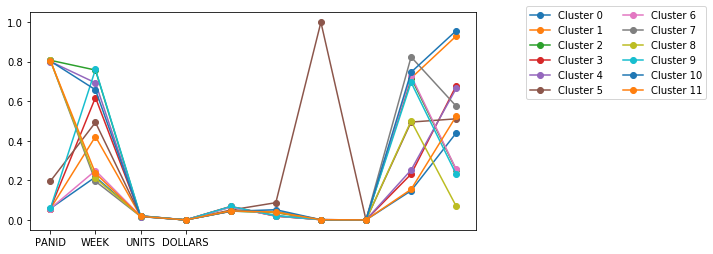

In [35]:
# here we find all centers of the clusters

centers = kmeans.cluster_centers_
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=10)
plt.legend(fontsize=10, ncol=2, bbox_to_anchor=(1.1, 1.05))
plt.show()

In [40]:
# Output after performing cluster analysis

df_transaction['Cluster_ID']=kmeans.labels_
df_transaction.head()

,PANID,WEEK,UNITS,OUTLET,DOLLARS,IRI_KEY,COLUPC,prod,Calendar_week_starting_on,Calendar_week_ending_on,Cluster_ID
0,1101238,1322,1,0,0.50,213290,13663200157,0,44,16,6
1,1216259,1322,2,0,1.00,213290,13663200157,0,44,16,6
2,1164905,1322,1,0,2.19,213290,13663200282,0,44,16,6
3,1404418,1322,1,0,2.29,213290,13663200900,0,44,16,6
4,1405373,1322,1,0,2.29,213290,13663200906,0,44,16,6


In [42]:
# Output of cluster centers


kmeans.cluster_centers_

array([[5.77202551e-02, 2.17123455e-01, 1.98548772e-02, 0.00000000e+00,
        6.51889249e-02, 2.17990431e-02, 1.28302491e-03, 0.00000000e+00,
        1.47630334e-01, 4.39819134e-01],
       [5.65192072e-02, 4.21851567e-01, 1.93381511e-02, 0.00000000e+00,
        6.69210169e-02, 1.94214707e-02, 1.35979915e-03, 0.00000000e+00,
        7.17477510e-01, 9.30142890e-01],
       [8.07487935e-01, 7.58084458e-01, 1.72617951e-02, 0.00000000e+00,
        4.50189363e-02, 3.63878953e-02, 8.32663919e-04, 0.00000000e+00,
        7.19496001e-01, 2.53482568e-01],
       [5.76919327e-02, 6.19223256e-01, 1.97574154e-02, 0.00000000e+00,
        6.80842361e-02, 1.89800940e-02, 1.35895936e-03, 0.00000000e+00,
        2.31597001e-01, 6.78243673e-01],
       [8.01387054e-01, 6.93488540e-01, 1.70678694e-02, 0.00000000e+00,
        4.44553863e-02, 4.07986230e-02, 8.65074921e-04, 0.00000000e+00,
        2.52467762e-01, 6.64823537e-01],
       [1.95700827e-01, 4.93285127e-01, 2.08250291e-02, 0.00000000e+00,
   

In [46]:
df_cluster=df_transaction.groupby(['Cluster_ID','WEEK']).sum().reset_index()
df_cluster=df_cluster.drop(['PANID','IRI_KEY','COLUPC'],axis=1)
df_cluster

,Cluster_ID,WEEK,UNITS,OUTLET,DOLLARS,prod,Calendar_week_starting_on,Calendar_week_ending_on
0,0,1323,1999,0,1586.61,0,17595,32844
1,0,1325,2451,0,2249.60,0,8724,53798
2,0,1329,2083,0,1844.39,0,1267,15204
3,0,1333,2687,0,2245.04,0,3144,20436
4,0,1336,2753,0,2486.57,0,26316,46440
...,...,...,...,...,...,...,...,...
151,11,1336,2098,0,1648.58,0,23103,40770
152,11,1338,3329,0,2300.45,0,16328,79599
153,11,1340,3239,0,2201.56,0,26124,50382
154,11,1342,3082,0,2175.13,0,9425,67860


In [47]:
df_uniq_clust=df_transaction.groupby(['Cluster_ID','WEEK']).count().reset_index()
df_uniq_clust=df_uniq_clust.drop(['PANID','WEEK','UNITS','OUTLET','DOLLARS','IRI_KEY','prod','Calendar_week_starting_on','Calendar_week_ending_on'],axis=1)
df_uniq_clust

,Cluster_ID,COLUPC
0,0,1173
1,0,1454
2,0,1267
3,0,1572
4,0,1548
...,...,...
151,11,1359
152,11,2041
153,11,1866
154,11,1885


In [48]:
df_final_clust=pd.merge(df_cluster,df_uniq_clust,on='Cluster_ID')
df_final_clust=df_final_clust.rename(columns={'UNITS':'units','DOLLARS':'spend','COLUPC':'unique_products'})

# Final output
df_final_clust

,Cluster_ID,WEEK,units,OUTLET,spend,prod,Calendar_week_starting_on,Calendar_week_ending_on,unique_products
0,0,1323,1999,0,1586.61,0,17595,32844,1173
1,0,1323,1999,0,1586.61,0,17595,32844,1454
2,0,1323,1999,0,1586.61,0,17595,32844,1267
3,0,1323,1999,0,1586.61,0,17595,32844,1572
4,0,1323,1999,0,1586.61,0,17595,32844,1548
...,...,...,...,...,...,...,...,...,...
3783,11,1346,2481,0,1835.67,0,0,16940,1359
3784,11,1346,2481,0,1835.67,0,0,16940,2041
3785,11,1346,2481,0,1835.67,0,0,16940,1866
3786,11,1346,2481,0,1835.67,0,0,16940,1885


In [50]:
df_total_units_clust=df_transaction.groupby(['Cluster_ID']).sum().reset_index()
df_total_units_clust=df_total_units_clust[['Cluster_ID','UNITS','DOLLARS']]
df_total_units_clust

,Cluster_ID,UNITS,DOLLARS
0,0,15817,14138.87
1,1,15281,14115.81
2,2,26127,18250.73
3,3,30322,28174.79
4,4,33596,23336.00
5,5,13136,9265.41
6,6,27925,25031.30
7,7,27110,18236.24
8,8,15534,10485.54
9,9,19563,17845.86


In [52]:
df_total_week_clust=df_transaction.groupby(['Cluster_ID']).count().reset_index()
df_total_week_clust=df_total_week_clust[['Cluster_ID','WEEK',]]
df_total_week_clust

,Cluster_ID,WEEK
0,0,9332
1,1,9113
2,2,16287
3,3,17926
4,4,21032
5,5,7598
6,6,16565
7,7,16659
8,8,9437
9,9,11365


In [53]:
df_final_avg_clust=pd.merge(df_total_units_clust,df_total_week_clust,on='Cluster_ID')

fn=lambda row: row.UNITS/row.WEEK
col=df_final_avg_clust.apply(fn,axis=1)
df_final_avg_clust=df_final_avg_clust.assign(**{'avg_units':col})

fn2=lambda row: row.DOLLARS/row.WEEK
col2=df_final_avg_clust.apply(fn2,axis=1)
df_final_avg_clust=df_final_avg_clust.assign(**{'avg_spends':col2})

df_final_avg_clust

,Cluster_ID,UNITS,DOLLARS,WEEK,avg_units,avg_spends
0,0,15817,14138.87,9332,1.694921,1.515095
1,1,15281,14115.81,9113,1.676835,1.548975
2,2,26127,18250.73,16287,1.604163,1.120570
3,3,30322,28174.79,17926,1.691510,1.571728
4,4,33596,23336.00,21032,1.597375,1.109547
5,5,13136,9265.41,7598,1.728876,1.219454
6,6,27925,25031.30,16565,1.685783,1.511096
7,7,27110,18236.24,16659,1.627349,1.094678
8,8,15534,10485.54,9437,1.646074,1.111109
9,9,19563,17845.86,11365,1.721337,1.570247


In [54]:
df_uniqueprod_clust=df_final_clust.groupby('Cluster_ID').sum().reset_index()
df_uniqueprod_clust=df_uniqueprod_clust[['Cluster_ID','unique_products']]
df_uniqueprod_clust

,Cluster_ID,unique_products
0,0,65324
1,1,72904
2,2,179157
3,3,268890
4,4,273416
5,5,395096
6,6,198780
7,7,149931
8,8,47185
9,9,113650


In [55]:
df_final_avg_clust=pd.merge(df_final_avg_clust,df_uniqueprod_clust,on='Cluster_ID')

fn=lambda row: row.unique_products/row.WEEK
col=df_final_avg_clust.apply(fn,axis=1)
df_final_avg_clust=df_final_avg_clust.assign(**{'avg_unique_products':col})

# Final output
df_final_avg_clust=df_final_avg_clust[['Cluster_ID','avg_units','avg_spends','unique_products']]
df_final_avg_clust

,Cluster_ID,avg_units,avg_spends,unique_products
0,0,1.694921,1.515095,65324
1,1,1.676835,1.548975,72904
2,2,1.604163,1.120570,179157
3,3,1.691510,1.571728,268890
4,4,1.597375,1.109547,273416
5,5,1.728876,1.219454,395096
6,6,1.685783,1.511096,198780
7,7,1.627349,1.094678,149931
8,8,1.646074,1.111109,47185
9,9,1.721337,1.570247,113650


# Read the panelist_dempgraphics.csv file.
# Calculate the average weekly spend/average weekly units purchased/average distinct verity of yogurt purchased by each cluster Print if the household age group (HH_AGE) has any distinct characteristic in each cluster.

In [37]:
df_panelist_demographics=pd.read_csv('panelist_demographics.csv')
df_panelist_demographics.head()

,PANID,Combined_Pre_Tax_Income_of_HH,Family_Size,HH_RACE,Type_of_Residential_Possession,HH_AGE,HH_EDU,HH_OCC,Age_Group_Applied_to_Male_HH,Education_Level_Reached_by_Male_,...,FEM_SMOKE,Number_of_Dogs,Number_of_Cats,Children_Group_Code,Marital_Status,Number_of_TVs_Used_by_HH,Number_of_TVs_Hooked_to_Cable,HH_Head_Race__RACE2_,HH_Head_Race__RACE3_,Microwave_Owned_by_HH
0,1100016,3,3,1,2,6,3,10,6,2,...,0,0,0,8,2,3,3,1,1,1
1,1100032,6,2,1,2,5,7,6,7,9,...,0,0,1,3,1,2,1,1,1,1
2,1100057,10,2,1,2,6,6,4,6,4,...,0,1,0,8,2,3,3,1,1,1
3,1100180,11,2,1,2,5,5,1,5,6,...,0,1,1,8,2,2,2,1,1,1
4,1100198,5,2,1,2,6,5,10,6,5,...,0,0,1,8,2,2,2,1,1,.


In [56]:
df_panelist_demographics.columns

Index(['PANID', 'Combined_Pre_Tax_Income_of_HH', 'Family_Size', 'HH_RACE',
       'Type_of_Residential_Possession', 'HH_AGE', 'HH_EDU', 'HH_OCC',
       'Age_Group_Applied_to_Male_HH', 'Education_Level_Reached_by_Male_',
       'Occupation_Code_of_Male_HH', 'Male_Working_Hour_Code', 'MALE_SMOKE',
       'Age_Group_Applied_to_Female_HH', 'Education_Level_Reached_by_Femal',
       'Occupation_Code_of_Female_HH', 'Female_Working_Hour_Code', 'FEM_SMOKE',
       'Number_of_Dogs', 'Number_of_Cats', 'Children_Group_Code',
       'Marital_Status', 'Number_of_TVs_Used_by_HH',
       'Number_of_TVs_Hooked_to_Cable', 'HH_Head_Race__RACE2_',
       'HH_Head_Race__RACE3_', 'Microwave_Owned_by_HH'],
      dtype='object')

In [58]:
df_panelist_demographics.dtypes

PANID                                int64
Combined_Pre_Tax_Income_of_HH        int64
Family_Size                          int64
HH_RACE                             object
Type_of_Residential_Possession       int64
HH_AGE                               int64
HH_EDU                               int64
HH_OCC                               int64
Age_Group_Applied_to_Male_HH         int64
Education_Level_Reached_by_Male_     int64
Occupation_Code_of_Male_HH           int64
Male_Working_Hour_Code               int64
MALE_SMOKE                          object
Age_Group_Applied_to_Female_HH       int64
Education_Level_Reached_by_Femal     int64
Occupation_Code_of_Female_HH         int64
Female_Working_Hour_Code             int64
FEM_SMOKE                           object
Number_of_Dogs                       int64
Number_of_Cats                       int64
Children_Group_Code                  int64
Marital_Status                       int64
Number_of_TVs_Used_by_HH            object
Number_of_T

In [60]:
label_encoders = dict()
encode_c = ['HH_RACE','MALE_SMOKE','FEM_SMOKE','Number_of_TVs_Used_by_HH',
       'Number_of_TVs_Hooked_to_Cable', 'HH_Head_Race__RACE2_','Microwave_Owned_by_HH']

for col in encode_c:
    le = preprocessing.LabelEncoder()
    df_panelist_demographics[col] = le.fit_transform(df_panelist_demographics[col])
    label_encoders[col] = le

In [61]:
# Normalization

scaler = MinMaxScaler()
X = scaler.fit_transform(df_panelist_demographics.values)

X[:5]

array([[0.00000000e+00, 2.50000000e-01, 4.00000000e-01, 5.00000000e-01,
        1.00000000e+00, 1.00000000e+00, 3.75000000e-01, 7.69230769e-01,
        8.57142857e-01, 1.25000000e-01, 7.69230769e-01, 5.00000000e-01,
        5.00000000e-01, 8.57142857e-01, 2.50000000e-01, 7.50000000e-01,
        5.00000000e-01, 5.00000000e-01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 4.00000000e-01, 4.54545455e-01, 4.00000000e-01,
        1.25000000e-01, 1.42857143e-01, 1.00000000e+00],
       [5.83282964e-06, 5.00000000e-01, 2.00000000e-01, 5.00000000e-01,
        1.00000000e+00, 8.33333333e-01, 8.75000000e-01, 4.61538462e-01,
        1.00000000e+00, 1.00000000e+00, 8.46153846e-01, 1.00000000e+00,
        0.00000000e+00, 7.14285714e-01, 7.50000000e-01, 4.16666667e-01,
        3.33333333e-01, 5.00000000e-01, 0.00000000e+00, 2.00000000e-01,
        2.85714286e-01, 2.00000000e-01, 3.63636364e-01, 2.00000000e-01,
        1.25000000e-01, 1.42857143e-01, 1.00000000e+00],
       [1.49466260e-05

In [62]:
# In this step we find out ideal k value

l = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    m = kmeans.inertia_
    l.append(m)

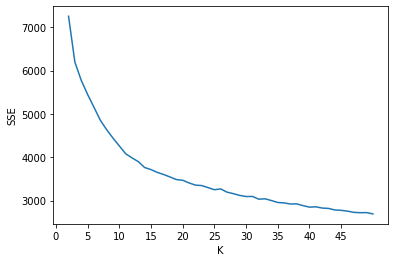

In [63]:
plt.plot(range(2, len(l) + 2), l)
plt.ylabel('SSE', fontsize=10)
plt.xlabel('K', fontsize=10)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [64]:
# The above graph shows bend at k=10. so n_clusters=10

kmeans = KMeans(n_clusters=6, n_init=10, max_iter=200)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
s = dict(zip(bins, hist))

for id_cluster, size in s.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(X)))

Cluster 0: 650 (0.11)
Cluster 1: 146 (0.03)
Cluster 2: 1035 (0.18)
Cluster 3: 1714 (0.30)
Cluster 4: 850 (0.15)
Cluster 5: 1296 (0.23)


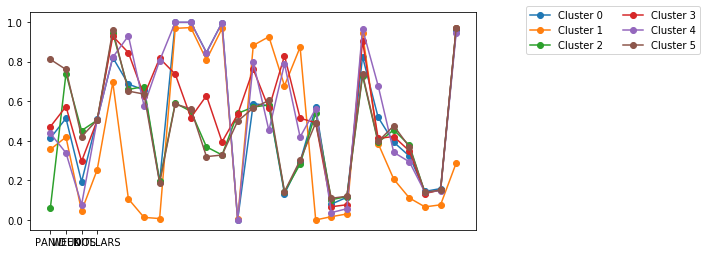

In [66]:
# here we find all centers of the clusters

centers = kmeans.cluster_centers_
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=10)
plt.legend(fontsize=10, ncol=2, bbox_to_anchor=(1.1, 1.05))
plt.show()

In [67]:
df_panelist_demographics['Cluster_ID']=kmeans.labels_

df_panelist_demographics.head()

,PANID,Combined_Pre_Tax_Income_of_HH,Family_Size,HH_RACE,Type_of_Residential_Possession,HH_AGE,HH_EDU,HH_OCC,Age_Group_Applied_to_Male_HH,Education_Level_Reached_by_Male_,...,Number_of_Dogs,Number_of_Cats,Children_Group_Code,Marital_Status,Number_of_TVs_Used_by_HH,Number_of_TVs_Hooked_to_Cable,HH_Head_Race__RACE2_,HH_Head_Race__RACE3_,Microwave_Owned_by_HH,Cluster_ID
0,1100016,3,3,1,2,6,3,10,6,2,...,0,0,8,2,5,4,1,1,1,3
1,1100032,6,2,1,2,5,7,6,7,9,...,0,1,3,1,4,2,1,1,1,0
2,1100057,10,2,1,2,6,6,4,6,4,...,1,0,8,2,5,4,1,1,1,2
3,1100180,11,2,1,2,5,5,1,5,6,...,1,1,8,2,4,3,1,1,1,2
4,1100198,5,2,1,2,6,5,10,6,5,...,0,1,8,2,4,3,1,1,0,3


In [74]:
df_panelist_demographics_final=pd.DataFrame(df_panelist_demographics.groupby(['Cluster_ID','HH_AGE']).count().reset_index())
df_panelist_demographics_final=df_panelist_demographics_final[['Cluster_ID','HH_AGE','PANID']]
df_panelist_demographics_final=df_panelist_demographics_final.rename(columns={'PANID':'count'})


In [75]:
# Final Output

df_panelist_demographics_final

,Cluster_ID,HH_AGE,count
0,0,1,2
1,0,2,68
2,0,3,133
3,0,4,183
4,0,5,176
5,0,6,88
6,1,0,111
7,1,1,8
8,1,2,11
9,1,3,7
